# Final Project 

**Title**: Deep Fake Detection

**Contributors**: Adam Haile, Alhagie Boye, Rudolph Evonich

**Onjective**: To develop a robust CNN model capable of accurately classifying video frames as real or fake.


This is a demo of our CNN model that will be use to classify videos as real or fake.


In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow
from tqdm import tqdm
import tensorflow.keras as keras
import frame_extractor as extractor
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

2023-11-19 17:26:13.709280: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-19 17:26:13.751299: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Loading & Data Preprocessing
The following cells handles the loading of video data and associated metadata and data preprocessing.

Video files and their corresponding metadata are retrieved from a designated directory (train_sample_videos/) and a JSON file (metadata.json).

A custom module named frame_extractor is utilized to extract frame from each video for further processing.

The orientation of the frames is checked, and those with vertical orientation are rotated to ensure consistency.

Based on the metadata information, binary labels are assigned to each frame: 1 for "FAKE" videos and 0 for "REAL" videos.

In [ ]:
def rotate_vertical(x):
    if x.shape == (1920,1080,3):
        return np.rot90(x)
    else:
        return x

In [22]:
train_X = []
train_Y = []
parent = os.path.dirname(os.getcwd())
videos = os.listdir(parent + "/train_sample_videos/")
f = open(parent + "/train_sample_videos/metadata.json")
valid = json.load(f)
for video in tqdm(videos):
    if video != "metadata.json":
        for frame in extractor.run_extraction(parent + "/train_sample_videos/" + video):
            train_X.append(rotate_vertical(frame))
            break
        train_Y.append(np.array([1,0]) if valid[video]["label"] == "FAKE" else np.array([0,1]))
        
train_X = np.array(train_X)
trai_Y = np.array(train)

  0%|          | 0/401 [00:00<?, ?it/s]


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

# Model Creation and Training
This cell creates the cnn model to be trained. (Currently a basic CNN example model, not our finished model)

This serves as a basic example and comprises a convolutional layer, max-pooling, flattening, and two dense layers.

The dataset is split into training and validation sets to assess the model's performance during training.

The model is trained on the training set for a specified number of epochs and batch size.

The training and validation accuracy are visualized over epochs using matplotlib to track the model's learning progress.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1078, 1918, 16)    448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 539, 959, 16)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8270416)           0         
                                                                 
 dense_2 (Dense)             (None, 16)                132326672 
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 132,327,154
Trainable params: 132,327,154
Non-trainable params: 0
________________________________________

2023-11-19 17:29:35.778348: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2023-11-19 17:29:36.431084: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f197575ce90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-19 17:29:36.431122: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-11-19 17:29:36.489736: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


52/52 [==============================] - 9s 135ms/step - loss: 1834870898688.0000 - accuracy: 0.7539 - val_loss: 0.6584 - val_accuracy: 0.8594
Epoch 2/10
52/52 [==============================] - 5s 95ms/step - loss: 0.8178 - accuracy: 0.7812 - val_loss: 0.6486 - val_accuracy: 0.8594
Epoch 3/10
52/52 [==============================] - 4s 86ms/step - loss: 0.6467 - accuracy: 0.7812 - val_loss: 0.6286 - val_accuracy: 0.8594
Epoch 4/10
52/52 [==============================] - 4s 86ms/step - loss: 0.6327 - accuracy: 0.7812 - val_loss: 0.6113 - val_accuracy: 0.8594
Epoch 5/10
52/52 [==============================] - 4s 86ms/step - loss: 0.6207 - accuracy: 0.7812 - val_loss: 0.5953 - val_accuracy: 0.8594
Epoch 6/10
52/52 [==============================] - 5s 87ms/step - loss: 0.6099 - accuracy: 0.7812 - val_loss: 0.5809 - val_accuracy: 0.8594
Epoch 7/10
52/52 [==============================] - 5s 87ms/step - loss: 0.6003 - accuracy: 0.7812 - val_loss: 0.5680 - val_accuracy: 0.8594
Epoch 8/10


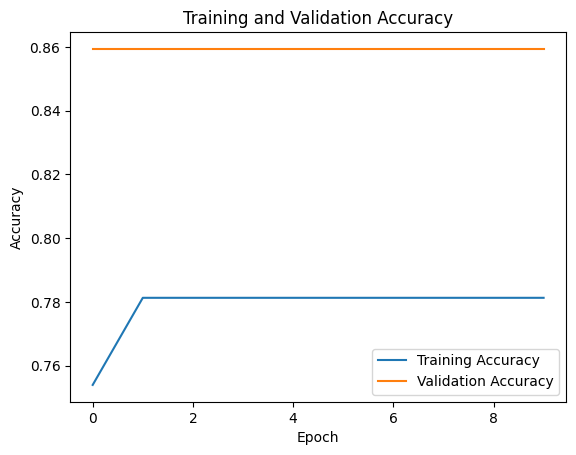

2/2 [==============================] - 4s 2s/step - loss: 0.5372 - accuracy: 0.8594
Validation Accuracy: 85.94%


In [12]:
cnn_epochs = 10
cnn_batch_size = 5
train_samples = len(train_X)
input_shape =  (1080,1920,3) #TODO: Set input_shape to the shape of our input
num_classes = 2

steps_per_epoch = train_samples/cnn_batch_size

# Split the data 
train_X, validation_X, train_Y, validation_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

cnn_model = tensorflow.keras.models.Sequential()
cnn_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(16, activation='relu'))  # Reduce the number of neurons in this layer
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])                     
cnn_model.summary()

train_X = np.array(train_X)
train_Y = np.array(train_Y)

history = cnn_model.fit(train_X, train_Y, epochs=cnn_epochs, batch_size=cnn_batch_size, validation_data=(validation_X, validation_Y))

# Plot for the experiment
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# The code elow evaluates the trained CNN model's performance on the validation set.
# The model's ability to distinguish between real and fake video frames is assessed using the validation data.
# The validation accuracy is calculated and displayed, providing an indication of the model's generalizability
evaluation = cnn_model.evaluate(validation_X, validation_Y)
print(f"Validation Accuracy: {evaluation[1] * 100:.2f}%")